In [8]:
from nvbts_utils.io.TactileBag import TactileBag

bag = TactileBag('./data/random_circle/bag/', 'random circle')
#bag.parse()

In [9]:
df = bag.parsed_bag
df

,ts,contact_status,contact_angle_x,contact_angle_y,contact_angle_z
0,1681910421108586635,False,0.001937,0.000916,0.002307
1,1681910421119487948,False,0.001905,0.000922,0.002355
2,1681910421157285961,False,0.001916,0.000927,0.002367
3,1681910421179050665,False,0.001916,0.000917,0.002355
4,1681910421215904532,False,0.001948,0.000944,0.002355
...,...,...,...,...,...
15939,1681910830964135541,False,0.001893,0.000953,0.002201
15940,1681910830975008116,False,0.001850,0.000945,0.002214
15941,1681910830981027281,False,0.001915,0.000989,0.002213
15942,1681910831013413168,False,0.001882,0.000985,0.002202


In [15]:
bag.events.max(axis=0).compute()

array([                345,                 259, 1681910833846465986,
                         1])

(array([2332., 3643., 3825., 3142., 1754.,  810.,  302.,  101.,   30.,
           4.]),
 array([5.00679016e-06, 9.78119373e-03, 1.95573807e-02, 2.93335676e-02,
        3.91097546e-02, 4.88859415e-02, 5.86621284e-02, 6.84383154e-02,
        7.82145023e-02, 8.79906893e-02, 9.77668762e-02]),
 <BarContainer object of 10 artists>)

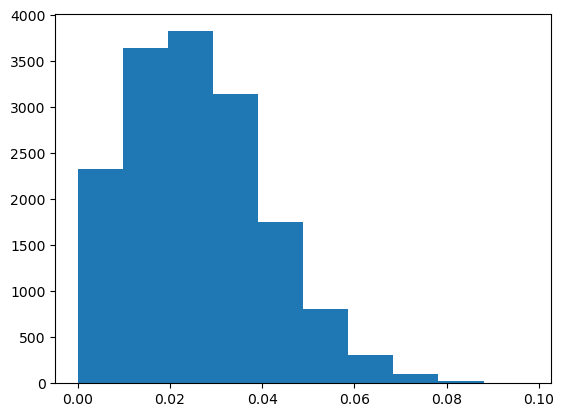

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.diff(df['ts']*1e-9))

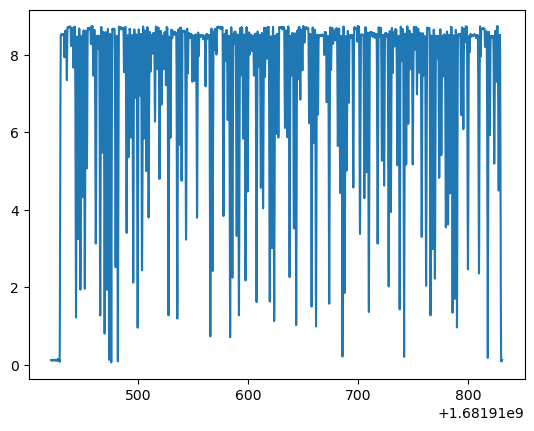

In [10]:
theta = np.degrees(np.sqrt(df['contact_angle_x']**2 + df['contact_angle_y']**2))
phi = np.degrees(np.arctan2(df['contact_angle_y'], df['contact_angle_x']))
plt.plot(df['ts']*1e-9, theta)


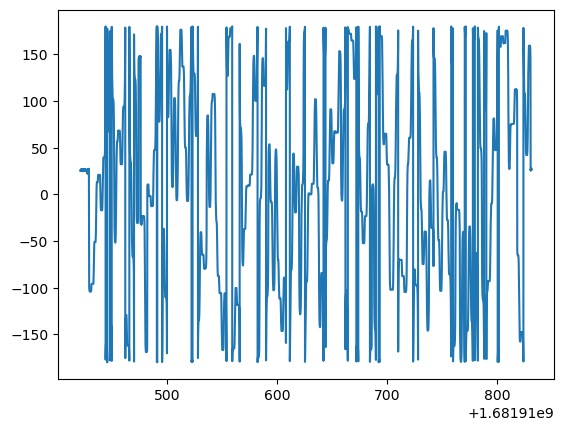

In [11]:
plt.plot(df['ts']*1e-9, phi)

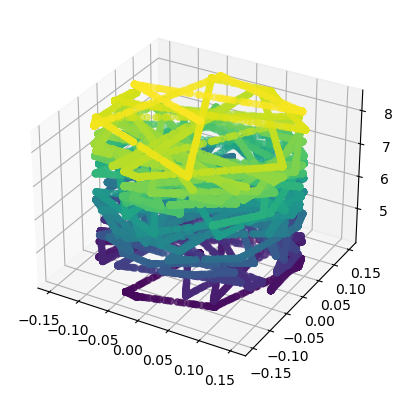

In [13]:
#make 3d ax
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['contact_angle_x'], df['contact_angle_y'], df['ts'], c=df['ts'])

In [22]:
(df['ts'].iloc[-1] - bag.events[-1, 2].compute())*1e-9

-2.7958499590000003

## Discretized preprocessing

In [25]:
import dask.array as da

dt = 30 #ms
knots = da.arange(0, df['ts'].max(), dt*1e6)
events_inbw = da.searchsorted(bag.events[:, 2], knots).compute()
events_inbw

In [1]:
bag.events

NameError: name 'bag' is not defined